6610402230 ศิริสุข ทานธรรม

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

seed_value = 123
np.random.seed(seed_value)

In [2]:
boston = load_boston()

/Users/sirisuk/anaconda3/envs/ds3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califo

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
boston.feature_names.shape

(13,)

In [5]:
dataset = pd.DataFrame(np.hstack((boston.data, boston.target.reshape(-1, 1))))
dataset.columns = list(boston.feature_names) + ['Price']
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
X = np.array(dataset.loc[:, dataset.columns != 'Price'])
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
min_val = np.min(X)
max_val = np.max(X)
X_norm = (X - min_val) / (max_val - min_val)

print(X_norm)

[[8.88888889e-06 2.53164557e-02 3.24894515e-03 ... 2.15189873e-02
  5.58227848e-01 7.00421941e-03]
 [3.84106892e-05 0.00000000e+00 9.94374121e-03 ... 2.50351617e-02
  5.58227848e-01 1.28551336e-02]
 [3.83825598e-05 0.00000000e+00 9.94374121e-03 ... 2.50351617e-02
  5.52503516e-01 5.66807314e-03]
 ...
 [8.54571027e-05 0.00000000e+00 1.67791842e-02 ... 2.95358650e-02
  5.58227848e-01 7.93248945e-03]
 [1.54135021e-04 0.00000000e+00 1.67791842e-02 ... 2.95358650e-02
  5.53375527e-01 9.11392405e-03]
 [6.66807314e-05 0.00000000e+00 1.67791842e-02 ... 2.95358650e-02
  5.58227848e-01 1.10829817e-02]]


In [8]:
Y = np.array(dataset.loc[:, dataset.columns == 'Price'])
Y

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

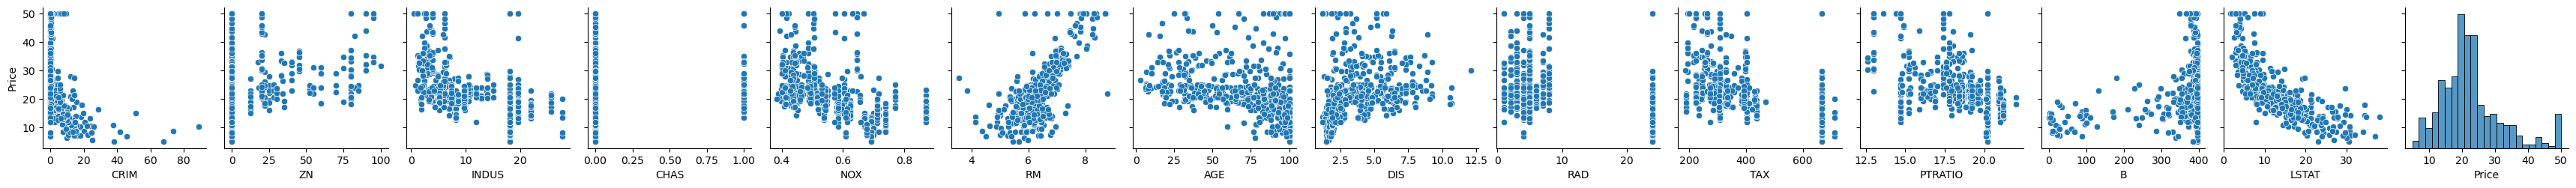

In [9]:
# sns.relplot(dataset,x=dataset.index,y=dataset.Price)
sns.pairplot(dataset, y_vars='Price')


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.2, random_state=seed_value)

In [11]:
x1 = x_test[0:2]
y1 = y_test[0:2]
x1.shape,np.transpose(x1)

((2, 13),
 array([[7.19209564e-02, 8.06610408e-05],
        [0.00000000e+00, 0.00000000e+00],
        [2.54571027e-02, 6.31504923e-03],
        [0.00000000e+00, 0.00000000e+00],
        [8.39662447e-04, 6.31504923e-04],
        [8.09704641e-03, 9.32489451e-03],
        [1.40646976e-01, 7.89029536e-02],
        [1.98734177e-03, 6.24149086e-03],
        [3.37552743e-02, 4.21940928e-03],
        [9.36708861e-01, 3.47398031e-01],
        [2.84106892e-02, 2.60196906e-02],
        [3.65682138e-03, 5.51758087e-01],
        [1.42194093e-02, 9.18424754e-03]]))

In [12]:
np.full((x1.shape[0],1),7),np.full((1,x1.shape[0]),7)

(array([[7],
        [7]]),
 array([[7, 7]]))

In [13]:
_x1 = np.append(x1.transpose(), np.full((1,x1.shape[0]),7), axis=0)
_x1.shape,_x1


((14, 2),
 array([[7.19209564e-02, 8.06610408e-05],
        [0.00000000e+00, 0.00000000e+00],
        [2.54571027e-02, 6.31504923e-03],
        [0.00000000e+00, 0.00000000e+00],
        [8.39662447e-04, 6.31504923e-04],
        [8.09704641e-03, 9.32489451e-03],
        [1.40646976e-01, 7.89029536e-02],
        [1.98734177e-03, 6.24149086e-03],
        [3.37552743e-02, 4.21940928e-03],
        [9.36708861e-01, 3.47398031e-01],
        [2.84106892e-02, 2.60196906e-02],
        [3.65682138e-03, 5.51758087e-01],
        [1.42194093e-02, 9.18424754e-03],
        [7.00000000e+00, 7.00000000e+00]]))

In [14]:
_w = np.ones(_x1.shape[0])
_w

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [15]:
np.dot(_w,_x1),_x1[13]

(array([8.26570014, 8.04007602]), array([7., 7.]))

In [16]:
dimension = _w.shape[0]
grad_v = np.zeros(dimension)

y_hat = np.dot(_w,_x1)
residual = y_hat - y1.flatten()
grad_v,y_hat,residual

for d in range(dimension):
    grad_v[d] = 2 *  np.dot(residual, _x1[d])

grad_v



array([-9.71668699e-01,  0.00000000e+00, -5.77285193e-01,  0.00000000e+00,
       -3.47504441e-02, -4.55194544e-01, -4.82318346e+00, -2.58449903e-01,
       -6.11260108e-01, -2.55115188e+01, -1.34849916e+00, -2.05304286e+01,
       -5.32433404e-01, -3.54119134e+02])

In [17]:
np.sum((np.dot(_w,_x1) - y1.flatten())**2)/_x1.shape[1]

194.9107863752735

In [18]:
import math
class linear_regression:#for multiple dimension
    def __init__(self):
        self.w = None
        self.loss = None
        self.bias = 1
        self.alpha = 1
        
    def set_learning_rate(self, alpha):
        self.alpha = alpha
    
    def fit(self, x, y,iteration=1500):
        self.loss = np.zeros(iteration)
        self.y = y
        # transpose to matrix d * n and add bias to new dim for all datapoint
        self.x = np.append(x.transpose(), np.full((1,x.shape[0]),self.bias), axis=0)
        # initialize weight vector (size = dim + 1 for bias)
        self.w = np.zeros(self.x.shape[0])
        for i in range(iteration):
            self.update(i)
    
    def update(self,i):
        w_current = self.w
        # step -1 * alpha * grad(loss(w))
        step = (-1)*self.alpha*self.compute_gradient(w_current,i)
        w_update = w_current + step
        
        current_loss = self.sq_loss(w_current)
        update_loss = self.sq_loss(w_update)
        self.loss[i] = update_loss
        if current_loss > update_loss:
            print("Loss (-) to", update_loss,)
        else:
            print("Loss (+) to", update_loss,)
        self.w = w_update
        
    def compute_gradient(self, w_current,i):
        dimension = w_current.shape[0]
        grad_v = np.zeros(dimension)

        y_hat = np.dot(w_current,self.x) 
        residual = y_hat - self.y
        
        for d in range(dimension):
            # grad in each dim(d) = 2 * (y_hatK - yK) dot x(d)K
            grad_v[d] = 2 *  np.dot(residual, self.x[d])
        print(i,"-> Gradient Norm", math.sqrt(np.inner(grad_v, grad_v)),end=' ')
        return grad_v

    def sq_loss(self, w):
        loss = np.sum(np.log((np.dot(w, self.x) - self.y) ** 2)) / self.x.shape[1]
        return loss
    
    def predict(self,x):
        x = np.append(x.transpose(), np.full((1,x.shape[0]),self.bias), axis=0)
        y_hat = np.dot(self.w,x) 
        return y_hat
        
        
        
        
    

In [19]:
h = linear_regression()

h.set_learning_rate(0.00001)

h.fit(x_train, y_train.flatten(), iteration=2000)

0 -> Gradient Norm 22560.547547675546 Loss (-) to 6.02034255163974
1 -> Gradient Norm 22268.991706782326 Loss (-) to 5.989090388584403
2 -> Gradient Norm 21981.22224885309 Loss (-) to 5.957590525022345
3 -> Gradient Norm 21697.190226816812 Loss (-) to 5.925822766621803
4 -> Gradient Norm 21416.847329057775 Loss (-) to 5.893763748561304
5 -> Gradient Norm 21140.145871197084 Loss (-) to 5.861386084810066
6 -> Gradient Norm 20867.03878798106 Loss (-) to 5.828657173002901
7 -> Gradient Norm 20597.47962527449 Loss (-) to 5.795537459287124
8 -> Gradient Norm 20331.42253215807 Loss (-) to 5.761977817664932
9 -> Gradient Norm 20068.822253128103 Loss (-) to 5.727915396634485
10 -> Gradient Norm 19809.634120397506 Loss (-) to 5.693266629701527
11 -> Gradient Norm 19553.81404629672 Loss (-) to 5.657914534035122
12 -> Gradient Norm 19301.318515773164 Loss (-) to 5.621683149672519
13 -> Gradient Norm 19052.104578987786 Loss (-) to 5.584278186972116
14 -> Gradient Norm 18806.129844008075 Loss (-) to

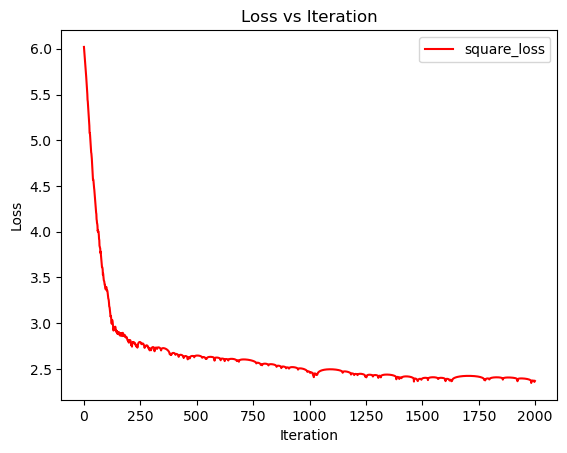

In [20]:
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs Iteration')
plt.plot(range(h.loss.shape[0]), h.loss, color='red', label='square_loss')
plt.legend()
plt.show()

In [21]:
y_predict = h.predict(x_test)
np.sum(np.log1p((y_predict - y_test.flatten()) ** 2)) / y_predict.shape[0]

2.9118392311871117

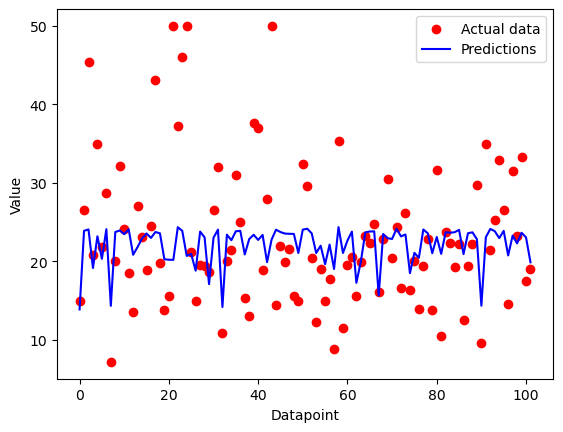

In [22]:
plt.xlabel('Datapoint')
plt.ylabel('Value')
plt.scatter(range(len(x_test)), y_test, color='red', label='Actual data')
plt.plot(range(len(x_test)), y_predict, color='blue', label='Predictions')
plt.legend()
plt.show()